# <center>House Price Prediction - Data Wrangling + ML Regression</center>

<hr style="border: none; border-top: 1px solid #000;">

<center>
    <span>
        Created by <b>Ian Yap</b>
        &emsp;|&emsp;
        Data from <a href="https://www.kaggle.com/datasets/marcopale/housing"><b>Kaggle</b></a>
        &nbsp;
    </span>
</center>

<br>

<center>
    <span>
        <a href="https://www.linkedin.com/in/ian-yap-052870139/"><b>LinkedIn</b></a>
        &emsp;|&emsp;
        <a href="https://xiyap.github.io/"><b>Portfolio</b></a>
    </span>
</center>
    
<hr style="border: none; border-top: 1px solid #000;">


## Table of Contents

1. [Background](#Background)
2. [Objectives](#Objectives)
3. [Feature Information](#Feature_Information)
4. [Import Libraries](#Import_Libraries)
5. [Data Loading](#Data_Loading)
6. [Feature Engineering](#Feature_Engineering)
    - [Outliers](#Outliers)
    - [Missing Data](#Missing_Data)
    - [Dummy Variables](#Dummy_Variables)
7. [Data Preparation](#Data_Preparation)
8. [Model Development](#Model_Development)
    - [Linear Regression (lr)](#Linear_Regression)
    - [Elastic Net with GridSearch (grid_en)](#Elastic_Net_with_GridSearch_(grid_en))
    - [Extreme Gradient Boost with GridSearch (grid_xgb & grid_xgb2)](#Extreme_Gradient_Boost_with_GridSearch_(grid_xgb_&_grid_xgb2))
9. [Model Comparison](#Model_Comparison)
10. [Conclusion](#Conclusion)
11. [Final Model Deployment](#Final_Model_Deployment)

## <a id='Background' href=#1> Background </a>

In this project, we are predicting the sale price of properties in dollars. The predictions are made based on size, features, conditions and location of the property. To understand how these factors affect the sale price of a property, a dataset containing existing info and sale price of many properties is provided.

In this dataset, the size of the property such as lot size, basement height and front porch size are provided. Features available in the property such as number of bathrooms, kitchens, pools and more are also included. Moreover, the condition of the property and its features are also available. Lastly, the location of the property is mentioned. All these data features along with the sale price of each property will be used to develop a predictive model capable of predicting the sale price of a given property.

## <a id='Objectives' href=#1> Objectives </a>

The *main* objective of this project is to **develop a predictive model which can predict the sale price of a property given the size, features, condition and location of the property.**

The *secondary* objective of this project is to identify the **determining factor which impacts the sale price of a house.**

## <a id='Feature_Information' href=#1> Feature Information </a>

- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale
- **SalePrice**: The property's sale price in dollars.

## <a id='Import_Libraries' href=#1> Import Libraries </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## <a id='Data_Loading' href=#1> Data Loading </a>

Load data from CSV file to be used for analysis and model development:

In [2]:
df_ori = pd.read_csv('AmesHousing.csv')

In [3]:
df = df_ori.copy()

In [4]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## <a id='Feature_Engineering' href=#1> Feature Engineering </a>

Before using the data, we will perform data wrangling to clean the data so that it is suitable for the predictive model.

We first check for any duplicated data and remove them as it will affect the data analysis and training of the predictive model:

In [6]:
print(f'Number of duplicated rows: {df.duplicated().sum()}')
# df.drop_duplicates(inplace = True)
# print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated rows: 0


Next, we will check the shape of the data and its data type:

Looks like our data has 2930 rows and 82 columns. There seems to be many missing values which we have to clean.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Removing 'Order' as we already have index:

In [8]:
df.drop('Order', axis = 1, inplace = True)

### <a id='Outliers' href=#1> Outliers </a>

Let's look at the correlation of independent features against the dependent variable:

In [9]:
abs(df.corr()['SalePrice']).sort_values(ascending = False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
PID                0.246521
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Enclosed Porch     0.128787
Kitchen AbvGr      0.119814
Screen Porch       0.112151
Overall Cond       0.101697
MS SubClass        0.085092
Pool Area          0.068403
Low Qual Fin SF    0.037660
Bsmt Half Bath     0.035835
Mo Sold            0.035259
3Ssn Porch         0.032225
Yr Sold            0

Plotting the features which have highest correlation to the dependent variable:

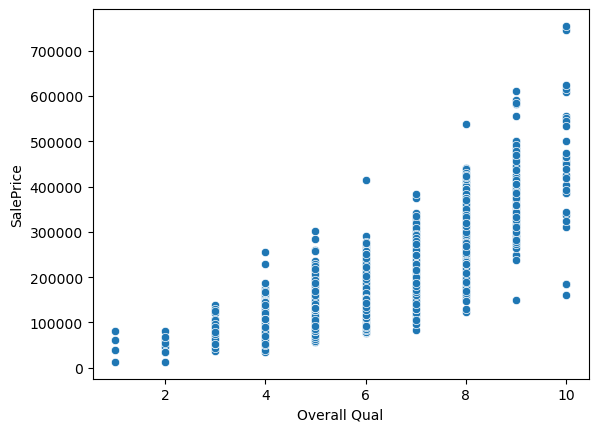

In [10]:
sns.scatterplot(data = df, x = 'Overall Qual', y = 'SalePrice');

Based on the trend, we see some outlier data when 'Overall Qual' is above 8 while 'SalePrice' is below 200,000.

In [11]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


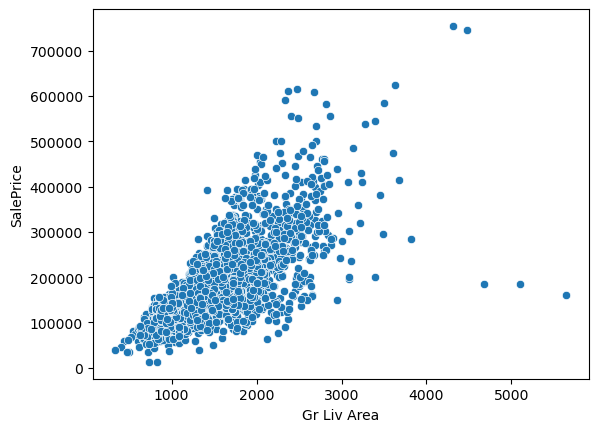

In [12]:
sns.scatterplot(data = df, x = 'Gr Liv Area', y = 'SalePrice');

Based on the trend, we see some outlier data when 'Gir Liv Area' is above 4,000 while 'SalePrice' is below 300,000.

In [13]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Remove these outliers as they are present in both conditions:

In [14]:
outliers = df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)].index

In [15]:
df.drop(outliers, axis = 0, inplace = True)

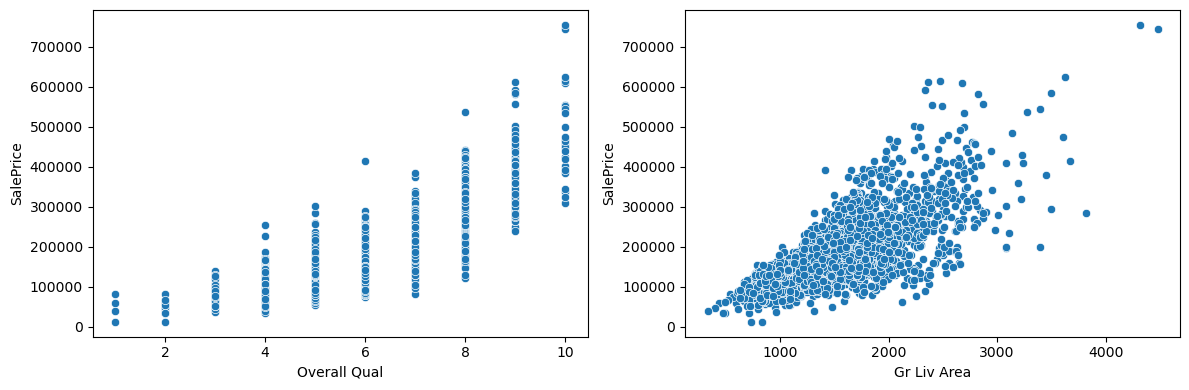

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax0 = axes[0]
ax1 = axes[1]

sns.scatterplot(data = df, x = 'Overall Qual', y = 'SalePrice', ax = ax0);
sns.scatterplot(data = df, x = 'Gr Liv Area', y = 'SalePrice', ax = ax1);

plt.tight_layout()
plt.show()

### <a id='Missing_Data' href=#1> Missing Data </a>

Finding missing data in the dataset:

In [17]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value / len(df)) * 100

df_miss = pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})
df_feature_missing = df_miss[df_miss['Total Missing Value'] > 0].sort_values('Missing Percentage', ascending = False)
df_feature_missing

,Total Missing Value,Missing Percentage
Pool QC,2914,99.589884
Misc Feature,2821,96.411483
Alley,2728,93.233083
Fence,2354,80.451128
Fireplace Qu,1422,48.598770
Lot Frontage,489,16.712235
Garage Cond,159,5.434040
Garage Qual,159,5.434040
Garage Finish,159,5.434040
Garage Yr Blt,159,5.434040


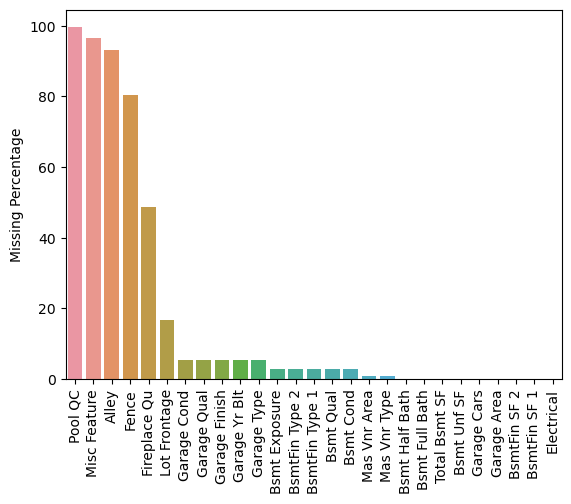

In [18]:
sns.barplot(x = df_feature_missing.index, y = df_feature_missing['Missing Percentage'])
plt.xticks(rotation = 90)
plt.show()

There are many missing rows related to Bsmt (basement). By looking at the unique values, we can assume that the missing values are due to a house having no basement. Hence, we will replace them with 'None' and '0'.

In [19]:
bsmt_str_cols =  ['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [20]:
bsmt_num_cols = ['Bsmt Half Bath', 'Bsmt Full Bath', 'Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

We will do the same with 'Mas Vnr' and 'Garage' features:

In [21]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [22]:
gar_str_cols = ['Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Type']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [23]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

For the 5 features with highest missing values, we could remove the features altogether due to the overwhelming number of missing values. However, since we know that these missing values indicates a 'None', we will also replace these values:

In [24]:
else_str_cols = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']
df[else_str_cols] = df[else_str_cols].fillna('None')

In [25]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value / len(df)) * 100

df_miss = pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})
df_feature_missing = df_miss[df_miss['Total Missing Value'] > 0].sort_values('Missing Percentage', ascending = False)
df_feature_missing

,Total Missing Value,Missing Percentage
Lot Frontage,489,16.712235
Electrical,1,0.034176
Garage Cars,1,0.034176
Garage Area,1,0.034176


We will drop the rows with low missing features values:

In [26]:
df = df.dropna(axis = 0,subset = ['Electrical', 'Garage Cars', 'Garage Area'])

In [27]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value / len(df)) * 100

df_miss = pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})
df_feature_missing = df_miss[df_miss['Total Missing Value'] > 0].sort_values('Missing Percentage', ascending = False)
df_feature_missing

,Total Missing Value,Missing Percentage
Lot Frontage,489,16.723666


For the missing values in 'Lot Frontage', we will fill these values by taking the mean lot frontage for the neighbourhood it is in:

In [28]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df.groupby('Neighborhood')['Lot Frontage'].transform('mean'))

In [29]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value / len(df)) * 100

df_miss = pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})
df_feature_missing = df_miss[df_miss['Total Missing Value'] > 0].sort_values('Missing Percentage', ascending = False)
df_feature_missing

,Total Missing Value,Missing Percentage
Lot Frontage,3,0.102599


Looks like there are still 3 missing values, let's fix that:

In [30]:
df[df['Lot Frontage'].isnull()][['Lot Frontage', 'Neighborhood']]

,Lot Frontage,Neighborhood
2256,NaN,GrnHill
2788,NaN,Landmrk
2892,NaN,GrnHill


In [31]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [32]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value / len(df)) * 100

df_miss = pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})
df_feature_missing = df_miss[df_miss['Total Missing Value'] > 0].sort_values('Missing Percentage', ascending = False)
df_feature_missing

,Total Missing Value,Missing Percentage


Now that the data is clean, we can explore the data using descriptive statistics to gain insights on the data.

In [33]:
num_col = df.select_dtypes(include = 'number').describe()
num_col.transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2924.0,7.141917e+08,1.887209e+08,526301100.0,5.284733e+08,535453190.0,9.071801e+08,1.007100e+09
MS SubClass,2924.0,5.738543e+01,4.267339e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2924.0,6.968231e+01,2.134777e+01,0.0,6.000000e+01,70.0,8.000000e+01,3.130000e+02
Lot Area,2924.0,1.010492e+04,7.782244e+03,1300.0,7.437500e+03,9429.0,1.152150e+04,2.152450e+05
Overall Qual,2924.0,6.090629e+00,1.405597e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2924.0,5.564637e+00,1.111441e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2924.0,1.971322e+03,3.023381e+01,1872.0,1.954000e+03,1973.0,2.000250e+03,2.010000e+03
Year Remod/Add,2924.0,1.984232e+03,2.086096e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2924.0,9.999384e+01,1.758225e+02,0.0,0.000000e+00,0.0,1.620000e+02,1.600000e+03
BsmtFin SF 1,2924.0,4.389843e+02,4.395011e+02,0.0,0.000000e+00,369.5,7.340000e+02,2.288000e+03


In [34]:
cat_col = df.select_dtypes(include = 'object').describe()
cat_col.transpose()

,count,unique,top,freq
MS Zoning,2924,7,RL,2268
Street,2924,2,Pave,2912
Alley,2924,3,None,2726
Lot Shape,2924,4,Reg,1857
Land Contour,2924,4,Lvl,2630
Utilities,2924,3,AllPub,2921
Lot Config,2924,5,Inside,2136
Land Slope,2924,3,Gtl,2783
Neighborhood,2924,28,NAmes,443
Condition 1,2924,9,Norm,2518


In [35]:
for col in cat_col:
    print(f'Unique values in column {col}: \
    \n{df[col].unique()} \
    \n')

Unique values in column MS Zoning:     
['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']     

Unique values in column Street:     
['Pave' 'Grvl']     

Unique values in column Alley:     
['None' 'Pave' 'Grvl']     

Unique values in column Lot Shape:     
['IR1' 'Reg' 'IR2' 'IR3']     

Unique values in column Land Contour:     
['Lvl' 'HLS' 'Bnk' 'Low']     

Unique values in column Utilities:     
['AllPub' 'NoSewr' 'NoSeWa']     

Unique values in column Lot Config:     
['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']     

Unique values in column Land Slope:     
['Gtl' 'Mod' 'Sev']     

Unique values in column Neighborhood:     
['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']     

Unique values in column Condition 1:     
['Norm' 'Feedr' 'PosN' 'RRNe' 'RRA

In [36]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

### <a id='Dummy_Variables' href=#1> Dummy Variables </a>

Convert categorical variables into dummy variables for model development:

In [37]:
df_dummy = df.copy()
df_dummy = pd.get_dummies(df_dummy)
df_dummy.head()

,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,526350040,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
2,526351010,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,526353030,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,527105010,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [38]:
df_dummy.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591801
Kitchen Qual_TA     -0.527703
Fireplace Qu_None   -0.481958
Bsmt Qual_TA        -0.453211
Garage Finish_Unf   -0.422538
                       ...   
Garage Cars          0.649011
Total Bsmt SF        0.660985
Gr Liv Area          0.728766
Overall Qual         0.803518
SalePrice            1.000000
Name: SalePrice, Length: 333, dtype: float64

## <a id='Data_Preparation' href=#1> Data Preparation </a>

Prepare the data and define some functions for model development:

In [39]:
X = df_dummy.drop(['PID', 'SalePrice'], axis = 1)
y = df_dummy['SalePrice']

In [40]:
# Train/validation/test split
from sklearn.model_selection import train_test_split

# Split train-test once if using GridSearchCV, else split train-validation-holdout test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [41]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [42]:
# Function to evaluate model
# prediction = model.predict(scaled_X_test)
# To define as (model_name)_lst if used in conjunction with error_compare_regression function
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def model_evaluation(prediction):
    mae = mean_absolute_error(y_test, prediction)
    mape = mean_absolute_percentage_error(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    r2 = r2_score(y_test, prediction)
    
    print(f'MAE: {round(mae, 2)}\nMAPE: {round(mape, 2)}\nRMSE: {round(rmse, 2)}\nR^2: {round(r2, 2)}')

    
    return [mae, mape, rmse, r2]

In [43]:
# Function to create comparison DF of MAE, MA%E, RMSE and R^2 for different models
# model_lst = list of model names ['lr', 'pr', 'grid_svr', 'grid_rfr']
# All (model_lst)_lst variables from 'model_evaluation' function must be defined
def error_compare_regression(model_lst):
    columns = ['MAE (lower better)', 'MAPE (lower better)', 'RMSE (lower better)', 'R^2 (closer to 1 better)']
    data_dict = {}
    
    for i in model_lst:
        data_dict[i+'_lst'] = globals()[i+'_lst']
    
    final_lst = [data_dict[i+'_lst'] for i in model_lst]
    return pd.DataFrame(data = final_lst, index = model_lst, columns = columns)

In [44]:
# Function to plot learning curve for regression model
# Arguments: (ML Algo, scaled X train data, y train data)
# model: to use model.best_estimator_ if performing GridSearchCV
def learning_curve_plot_reg(model, X, y):
    from sklearn.model_selection import learning_curve
    from sklearn.model_selection import ShuffleSplit
    from sklearn.metrics import mean_squared_error

    shuffle_split = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 101)

    # Use learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv = shuffle_split, scoring = 'neg_mean_squared_error', 
        n_jobs = -1, train_sizes = np.linspace(.1, 1.0, 10))

    # Convert the negative mean squared error to positive
    train_scores = -train_scores
    test_scores = -test_scores
    
    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    # Plot the learning curve
    plt.figure(figsize=(8, 4))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    
    # Plot training scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    
    # Plot cross-validation scores
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation Score")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    
    plt.legend(loc = "best")
    plt.show()

## <a id='Model_Development' href=#1> Model Development </a>

Develop the model using the processed data.

Multiple machine learning algorithms will be used while tuning the hyperparameters to ensure the best model is developed.

### <a id='Linear_Regression_(lr)' href=#1> Linear Regression (lr) </a>

In [45]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(scaled_X_train, y_train)
y_pred_lr = lr.predict(scaled_X_test)
lr_lst = model_evaluation(y_pred_lr) # self defined function

MAE: 2130544017662011.0
MAPE: 22609418082.83
RMSE: 3.810836377099551e+16
R^2: -2.146297145905528e+23


### <a id='Elastic_Net_with_GridSearch_(grid_en)' href=#1> Elastic Net with GridSearch (grid_en) </a>

In [46]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

en = ElasticNet()
alpha = [0.1, 1, 5, 10, 50, 100]
l1_ratio = [.1, .5, .7, .9, .95, .99, 1]
param_grid_en = {'alpha': alpha, 'l1_ratio': l1_ratio}

grid_en = GridSearchCV(en, param_grid_en)
grid_en.fit(scaled_X_train, y_train)
grid_en.best_params_

{'alpha': 10, 'l1_ratio': 0.99}

In [47]:
# Test error
y_pred_grid_en = grid_en.predict(scaled_X_test)
grid_en_lst = model_evaluation(y_pred_grid_en)

MAE: 15266.81
MAPE: 0.09
RMSE: 23738.34
R^2: 0.92


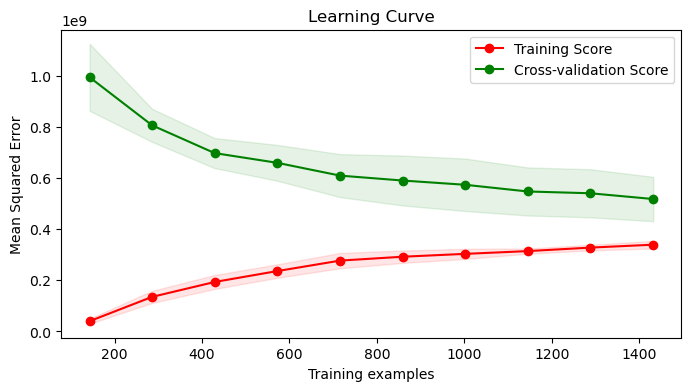

In [48]:
# Plot learning curve

learning_curve_plot_reg(grid_en.best_estimator_, scaled_X_train, y_train)

### <a id='Extreme_Gradient_Boost_with_GridSearch_(grid_xgb_&_grid_xgb2)' href=#1> Extreme Gradient Boost with GridSearch (grid_xgb & grid_xgb2) </a>

In [49]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
learning_rate = [0.01, 0.1, 0.2]
n_estimators = [50, 100, 200]
max_depth = [3, 5, 7]
min_child_weight = [1, 3, 5]
subsample = [0.8, 0.9, 1.0]
colsample_bytree = [0.8, 0.9, 1.0]
param_grid_xgb = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_child_weight': min_child_weight, 'subsample': subsample, 'colsample_bytree': colsample_bytree}

grid_xgb = GridSearchCV(xgb, param_grid_xgb)
grid_xgb.fit(scaled_X_train, y_train)
grid_xgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [50]:
y_pred_grid_xgb = grid_xgb.predict(scaled_X_test)
grid_xgb_lst = model_evaluation(y_pred_grid_xgb)

MAE: 13808.65
MAPE: 0.08
RMSE: 20634.65
R^2: 0.94


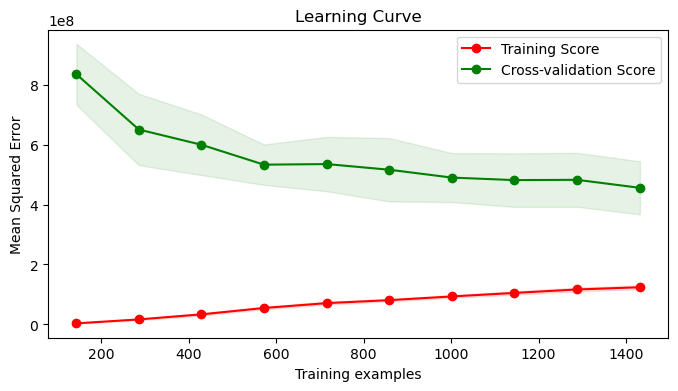

In [51]:
# Plot learning curve

learning_curve_plot_reg(grid_xgb.best_estimator_, scaled_X_train, y_train)

As the cross-validation curve has not fully converged, more training data could be used to further reduce the error of the model.

Let's try removing feature of less importance from the model:

In [52]:
best_xgb = grid_xgb.best_estimator_

feature_importances = pd.DataFrame(data = best_xgb.feature_importances_, index = X.columns, columns = ['feature_importances']).sort_values(by = 'feature_importances', ascending = False)
feature_importances

,feature_importances
Garage Cars,0.133755
Overall Qual,0.133176
Exter Qual_TA,0.091430
Garage Type_Detchd,0.082708
Bsmt Qual_Ex,0.065645
...,...
Exterior 2nd_Brk Cmn,0.000000
Exterior 2nd_CBlock,0.000000
Exterior 2nd_CmentBd,0.000000
Exterior 2nd_HdBoard,0.000000


In [53]:
# Threshold to remove for feature importance
threshold = 0
less_importance = list(feature_importances[feature_importances['feature_importances'] == threshold].index)

In [54]:
X_train_f_importance = X_train.drop(less_importance, axis = 1)
X_test_f_importance = X_test.drop(less_importance, axis = 1)
scaled_X_train_f_importance = scaler.fit_transform(X_train_f_importance)
scaled_X_test_f_importance = scaler.transform(X_test_f_importance)

In [55]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
learning_rate = [0.01, 0.1, 0.2]
n_estimators = [50, 100, 200]
max_depth = [3, 5, 7]
min_child_weight = [1, 3, 5]
subsample = [0.8, 0.9, 1.0]
colsample_bytree = [0.8, 0.9, 1.0]
param_grid_xgb2 = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_child_weight': min_child_weight, 'subsample': subsample, 'colsample_bytree': colsample_bytree}

grid_xgb2 = GridSearchCV(xgb, param_grid_xgb2)
grid_xgb2.fit(scaled_X_train_f_importance, y_train)
grid_xgb2.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.9}

In [56]:
y_pred_grid_xgb2 = grid_xgb2.predict(scaled_X_test_f_importance)
grid_xgb2_lst = model_evaluation(y_pred_grid_xgb2)

MAE: 14158.48
MAPE: 0.08
RMSE: 20929.03
R^2: 0.94


The model performs slightly worse with the less important features removed. This could be due to the model overfitting after removing these features. The features removed might also be correlated with other features, removing these features might affect the model's ability to capture the shared information between features.

## <a id='Model_Comparison' href=#1> Model Comparison </a>

Comparison of error and R^2 scores for different algorithms:

In [57]:
index = ['lr', 'grid_en', 'grid_xgb', 'grid_xgb2']
df_error_compare = error_compare_regression(index) # self defined function
df_error_compare

,MAE (lower better),MAPE (lower better),RMSE (lower better),R^2 (closer to 1 better)
lr,2.130544e+15,2.260942e+10,3.810836e+16,-2.146297e+23
grid_en,1.526681e+04,8.899485e-02,2.373834e+04,9.167182e-01
grid_xgb,1.380865e+04,8.102431e-02,2.063465e+04,9.370721e-01
grid_xgb2,1.415848e+04,8.252812e-02,2.092903e+04,9.352638e-01


Sorting the dataframe to view the best model for each categories:

In [58]:
print('Sorted by best MAE:')
df_error_compare.sort_values('MAE (lower better)', ascending = True)

Sorted by best MAE:


,MAE (lower better),MAPE (lower better),RMSE (lower better),R^2 (closer to 1 better)
grid_xgb,1.380865e+04,8.102431e-02,2.063465e+04,9.370721e-01
grid_xgb2,1.415848e+04,8.252812e-02,2.092903e+04,9.352638e-01
grid_en,1.526681e+04,8.899485e-02,2.373834e+04,9.167182e-01
lr,2.130544e+15,2.260942e+10,3.810836e+16,-2.146297e+23


In [59]:
print('Sorted by best MAPE:')
df_error_compare.sort_values('MAPE (lower better)', ascending = True)

Sorted by best MAPE:


,MAE (lower better),MAPE (lower better),RMSE (lower better),R^2 (closer to 1 better)
grid_xgb,1.380865e+04,8.102431e-02,2.063465e+04,9.370721e-01
grid_xgb2,1.415848e+04,8.252812e-02,2.092903e+04,9.352638e-01
grid_en,1.526681e+04,8.899485e-02,2.373834e+04,9.167182e-01
lr,2.130544e+15,2.260942e+10,3.810836e+16,-2.146297e+23


In [60]:
print('Sorted by best RMSE:')
df_error_compare.sort_values('RMSE (lower better)', ascending = True)

Sorted by best RMSE:


,MAE (lower better),MAPE (lower better),RMSE (lower better),R^2 (closer to 1 better)
grid_xgb,1.380865e+04,8.102431e-02,2.063465e+04,9.370721e-01
grid_xgb2,1.415848e+04,8.252812e-02,2.092903e+04,9.352638e-01
grid_en,1.526681e+04,8.899485e-02,2.373834e+04,9.167182e-01
lr,2.130544e+15,2.260942e+10,3.810836e+16,-2.146297e+23


In [61]:
print('Sorted by best R^2 score:')
df_error_compare.sort_values('R^2 (closer to 1 better)', ascending = False)

Sorted by best R^2 score:


,MAE (lower better),MAPE (lower better),RMSE (lower better),R^2 (closer to 1 better)
grid_xgb,1.380865e+04,8.102431e-02,2.063465e+04,9.370721e-01
grid_xgb2,1.415848e+04,8.252812e-02,2.092903e+04,9.352638e-01
grid_en,1.526681e+04,8.899485e-02,2.373834e+04,9.167182e-01
lr,2.130544e+15,2.260942e+10,3.810836e+16,-2.146297e+23


Observation:
1. **grid_xgb has the best MAE, MAPE, RMSE and R^2 scores.** This shows that the model is the most robust model where its predictions are very close to the true value and relates the features to the target the best.
2. grid_xgb2 has the 2nd best MAE, MAPE, RMSE and R^2. Meaning it is less robust and susceptible to outliers in the data. The features in the model also explains less of the variance in the targets.
3. grid_en ranks 3rd for all categories.
4. lr is dead last in all categories. The linear regression model is too simple to fit the data as most features are not in linear relationship with the target.

## <a id='Conclusion' href=#1> Conclusion </a>

Based on the results of this project, we can conclude that:
1. We have identified that the **overall material and finish quality, above ground living area, garage car capacity, garage size and basement size are the top 5 features that will affect the sale price.**
2. This is followed by the **first floor size, year built, number of full bathrooms above grade, year of remodel and year the garage was built.**
3. It seems like the overall size of the property plays the most important role in determining the sale price. Surprisingly, the garage is a very important feature that is instrumental to the sale price of a property.
4. The **best model is the Extreme Gradient Boost (grid_xgb) model** as it is the most robust model. It has a **MAE of 13,808.65, MAPE of 8%, RMSE of 20,634.65 and R^2 of 0.94**. This model produces predictions with the least errors and all the predictions won't deviate too much from the true value, with a maximum deviation of 8% from the actual sale price, meaning there won't be major errors in predicting the sale price.

## <a id='Final_Model_Deployment' href=#1> Final Model Deployment </a>

Create the final model with the best hyperparameters and fit the model with whole dataset.

In [63]:
# Create best model:
final_model_xgb = XGBRegressor(colsample_bytree = 0.9, learning_rate = 0.2, max_depth = 3, min_child_weight = 1, n_estimators = 200, subsample = 0.9)
X_f_importance = X.drop(less_importance, axis = 1)
scaled_X_f_importance = scaler.transform(X_f_importance)
final_model_xgb.fit(scaled_X_f_importance, y)

# Create data column transformer:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

def fill_na_str_cols(df):
    return df.fillna('None', inplace = True)

def fill_na_num_cols(df):
    return df.fillna(0, inplace = True)

def fill_na_conv_str(df):
    df['MS SubClass'] = df['MS SubClass'].apply(str)
    return df

preprocessor = ColumnTransformer(
    transformers=[
        ('fill_na_str_cols', FunctionTransformer(fill_na_str_cols), ['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond', 'Mas Vnr Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Type', 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']),
        ('fill_na_num_cols', FunctionTransformer(fill_na_num_cols), ['Bsmt Half Bath', 'Bsmt Full Bath', 'Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1', 'Mas Vnr Area', 'Garage Yr Blt', 'Lot Frontage']),
        ('fill_na_conv_str', FunctionTransformer(fill_na_conv_str), ['MS SubClass'])
    ])

# Create a pipeline which transforms columns, fitted scaler and model:
from sklearn.pipeline import Pipeline
preprocess_pipeline = Pipeline([('preprocessor', preprocessor)])
final_pipeline = Pipeline([('scaler', scaler), ('model', final_model_xgb)])

# Save model:
import joblib
joblib.dump(preprocess_pipeline, 'house_price_model_preprocess_pipeline.pkl')
joblib.dump(final_pipeline, 'house_price_model_pipeline.pkl')
joblib.dump(list(X_f_importance.columns), 'house_price_col_names.pkl')
joblib.dump(list(df_ori.columns[:-1]), 'house_price_ori_X_col_names.pkl')

['house_price_ori_X_col_names.pkl']

In [64]:
# # To load model:
# import joblib
# preprocess_pipeline = joblib.load('house_price_model_preprocess_pipeline.pkl')
# loaded_model = joblib.load('house_price_model_pipeline.pkl')
# dummy_columns = joblib.load('house_price_col_names.pkl')
# ori_columns = joblib.load('house_price_ori_X_col_names.pkl')

# # To use model:
# import pandas as pd
# # 1. For 1 list, new_list_data = [['values']]:
# new_list_data = [[]]
# new_data = pd.get_dummies(pd.DataFrame(new_list_data, columns = ori_columns)).reindex(columns = dummy_columns, fill_value = 0)
# loaded_model.predict(new_data)

# # 2. For new df, df_new = pd read file:
# df_new = pd.read_excel('example.xlsx')
# df_new = preprocess_pipeline.fit_transform(df_new)
# new_data = pd.get_dummies(df_new).reindex(columns = dummy_columns, fill_value = 0)
# loaded_model.predict(new_data)